# Data Analysis Phase

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [42]:
dataset=pd.read_csv('laptops.csv',index_col=0)

## print shape of dataset with rows and columns
print(dataset.shape)

(1303, 12)


In [43]:
dataset.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Missing values

In [44]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().any()]

features_with_na

[]

There are no missing values

Converting RAM to numeric value for ease of analysis

In [45]:
data=dataset.copy()

In [46]:
dataset=data.copy()
dataset['Ram(GB)']=[word.strip('GB') for word in dataset['Ram']]
dataset['Ram(GB)']=pd.to_numeric(dataset['Ram(GB)'])
dataset.drop('Ram',axis=1,inplace=True)
numerical_features.append('Ram(GB)')
dataset.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Weight,Price_euros,Ram(GB)
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,8
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,8
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,16
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,8


In [47]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  3


,Inches,Price_euros,Ram(GB)
1,13.3,1339.69,8
2,13.3,898.94,8
3,15.6,575.00,8
4,15.4,2537.45,16
5,13.3,1803.60,8


# Discrete variables

In [48]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [49]:
discrete_feature

['Inches', 'Ram(GB)']

In [50]:
dataset[discrete_feature].head(15)

,Inches,Ram(GB)
1,13.3,8
2,13.3,8
3,15.6,8
4,15.4,16
5,13.3,8
6,15.6,4
7,15.4,16
8,13.3,8
9,14.0,16
10,14.0,8


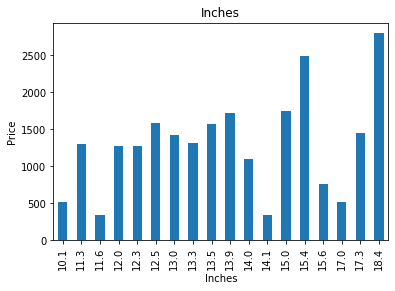

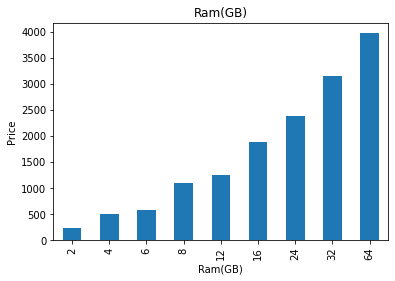

In [53]:
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['Price_euros'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

We observe that higher RAM results in higher price, but the same cannot be said for the screen size

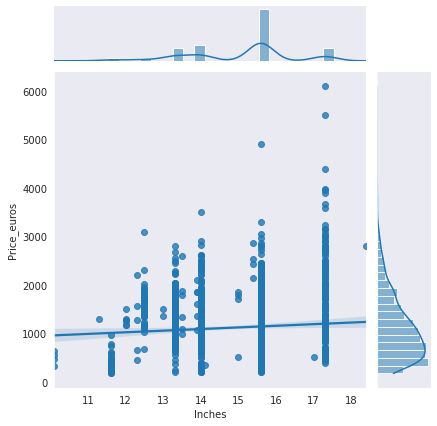

In [58]:
#plotting histograms
import seaborn as sns
with sns.axes_style("dark"):
    sns.jointplot(x='Inches', y='Price_euros', data= dataset[numerical_features], kind = "reg")

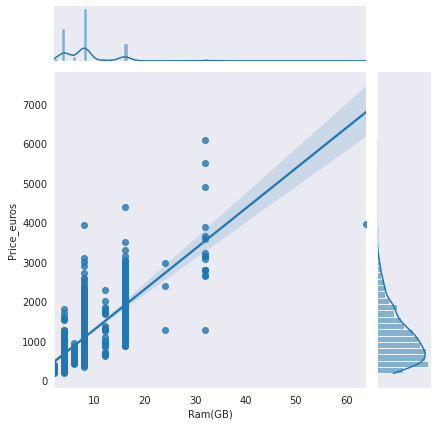

In [59]:
#plotting histograms
import seaborn as sns
with sns.axes_style("dark"):
    sns.jointplot(x='Ram(GB)', y='Price_euros', data= dataset[numerical_features], kind = "reg")

Thus there is a relationship between the size in inches and the RAM and the price of the laptop.

<AxesSubplot:xlabel='Inches', ylabel='Probability'>

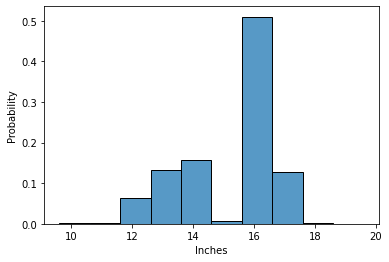

In [60]:
sns.histplot(data=dataset[numerical_features], x="Inches", stat="probability", discrete=True)


A given laptop is most likely to be around 16 inches in size

### Continuous Variables

In [61]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['availability']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 1


In [62]:
continuous_feature

['Price_euros']

<AxesSubplot:xlabel='Price_euros', ylabel='Count'>

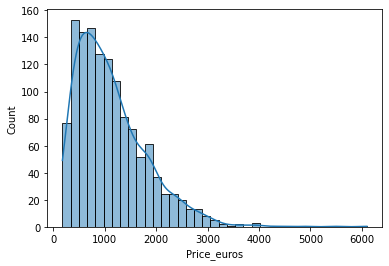

In [63]:
## Lets analyse the continuous values by creating histograms to understand the distribution

sns.histplot(data = data, x= "Price_euros", kde=True)

<AxesSubplot:xlabel='Price_euros', ylabel='Count'>

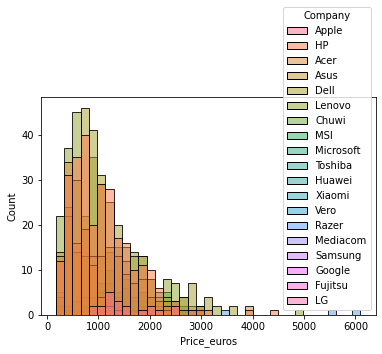

In [64]:
sns.histplot(x = "Price_euros", data = data, hue = "Company")

We can observe that HP, Lenovo, Dell and Acer have the highest number of models

<AxesSubplot:xlabel='Price_euros', ylabel='Count'>

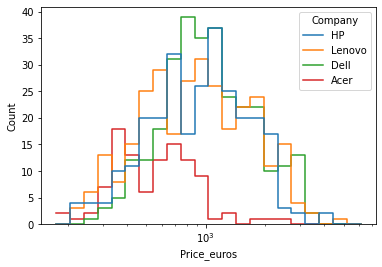

In [65]:
sns.histplot(data = data, x= "Price_euros",hue = "Company", hue_order = [ "HP","Lenovo", 'Dell',"Acer"],
            log_scale = True, element ="step", fill = False, common_norm = False)

In [66]:
data.describe()

,Inches,Price_euros,Ram(GB)
count,1303.000000,1303.000000,1303.000000
mean,15.017191,1123.686992,8.382195
std,1.426304,699.009043,5.084665
min,10.100000,174.000000,2.000000
25%,14.000000,599.000000,4.000000
50%,15.600000,977.000000,8.000000
75%,15.600000,1487.880000,8.000000
max,18.400000,6099.000000,64.000000


# Outliers

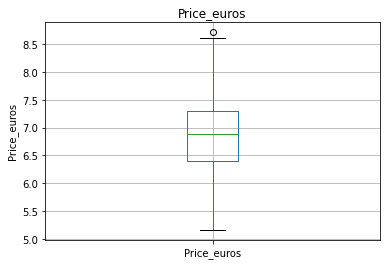

In [67]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Categorical Variables

In [68]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O' and data[feature].nunique()<100]
categorical_features

['Company', 'TypeName', 'ScreenResolution', 'Memory', 'OpSys']

In [69]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,dataset[feature].nunique()))

The feature is Company and number of categories are 19
The feature is TypeName and number of categories are 6
The feature is ScreenResolution and number of categories are 40
The feature is Memory and number of categories are 39
The feature is OpSys and number of categories are 9


In [70]:
dataset[categorical_features].head()

,Company,TypeName,ScreenResolution,Memory,OpSys
1,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,128GB SSD,macOS
2,Apple,Ultrabook,1440x900,128GB Flash Storage,macOS
3,HP,Notebook,Full HD 1920x1080,256GB SSD,No OS
4,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,512GB SSD,macOS
5,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,256GB SSD,macOS


Find out the relationship between categorical variable and dependent feature Price

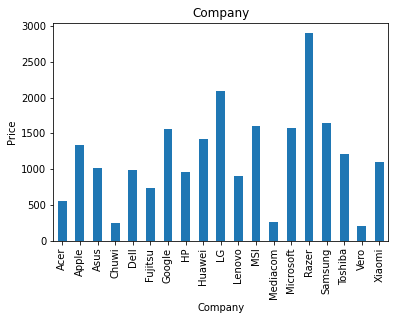

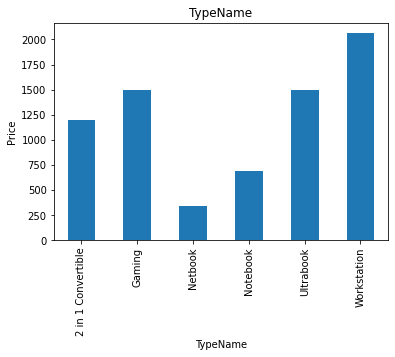

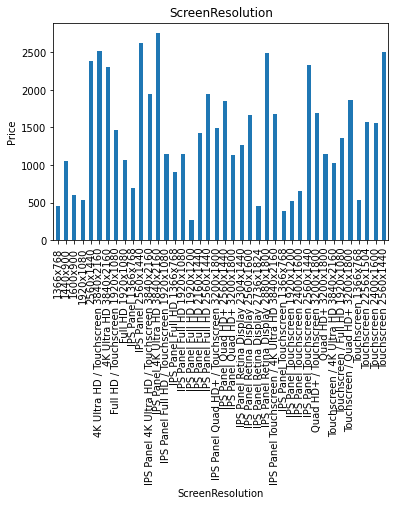

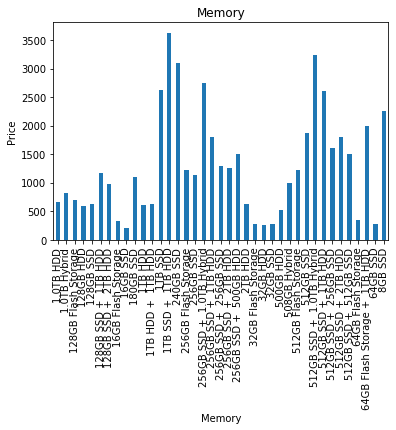

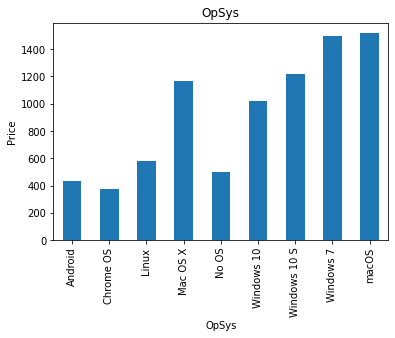

In [71]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Price_euros'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [74]:
data=dataset.copy()
data['Weight']=[word.strip('kg') for word in data['Weight']]
data['Weight']=pd.to_numeric(data['Weight'])
data['Weight'].unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

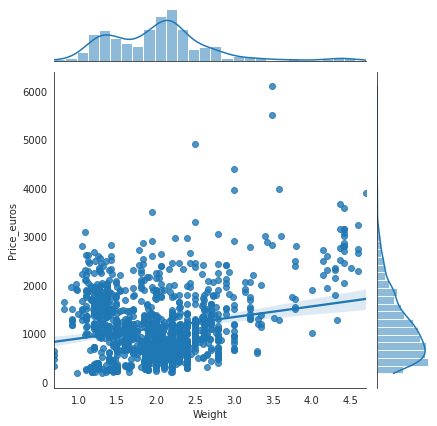

In [73]:
plotlist=['Weight','Price_euros']
with sns.axes_style("white"):
    sns.jointplot(x='Weight', y='Price_euros', data= data[plotlist], kind = "reg")
    

We see that laptop weight has little to no effect on its price. However, we should note that a few heavier laptops are expensive, owing to their heavy GPUs and other components

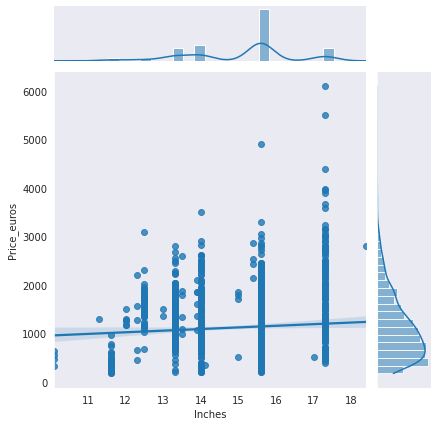

In [27]:
#plotting histograms
with sns.axes_style("dark"):
    sns.jointplot(x='Inches', y='Price_euros', data= dataset[numerical_features], kind = "reg")
    